- IMPORT

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


#processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#model_selection
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#mertrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

- Read Data

In [2]:
df=pd.read_csv("Breast_Cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

# Exploratory Data Analysis

In [7]:
def bar_chart(feature):
    survived = df[df['Status']=='Alive'][feature].value_counts()
    dead = df[df['Status']=='Dead'][feature].value_counts()
    
    data = pd.DataFrame([survived,dead])
    
    data.index = ['Alive','Dead']
    
    data.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.xticks(rotation=0)

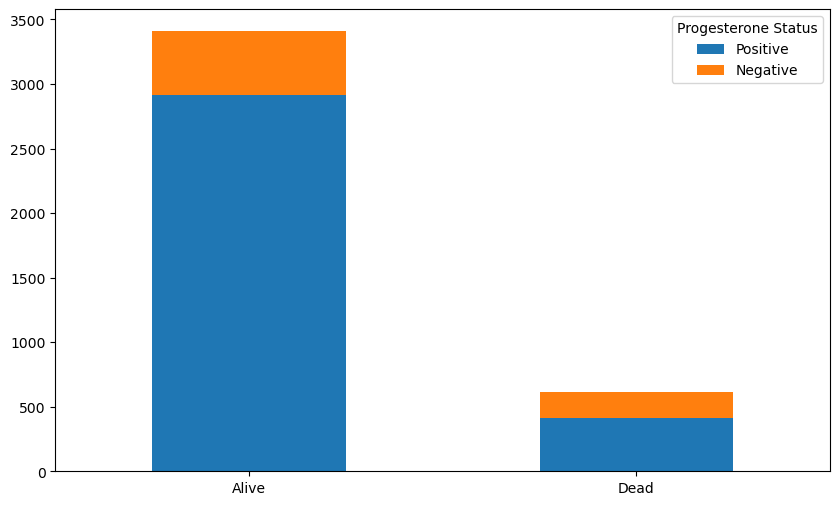

In [8]:
#Progesterone Status

bar_chart('Progesterone Status')

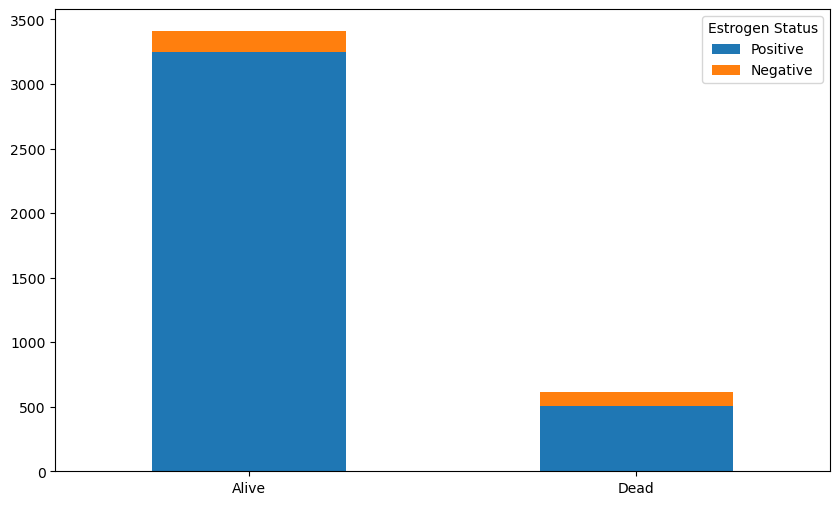

In [9]:
#Estrogen Status

bar_chart("Estrogen Status")

In [10]:
#T Stages

df['T Stage']=df['T Stage ']

In [11]:
df.drop(columns='T Stage ',inplace=True)

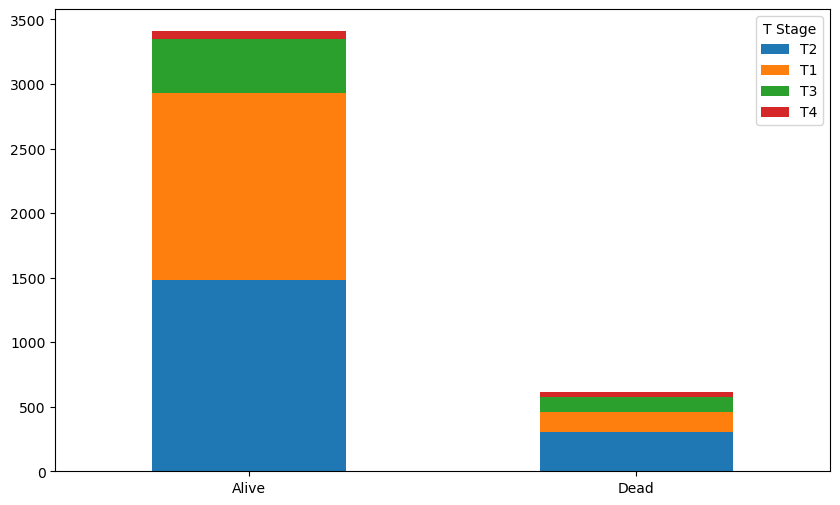

In [12]:
bar_chart('T Stage')

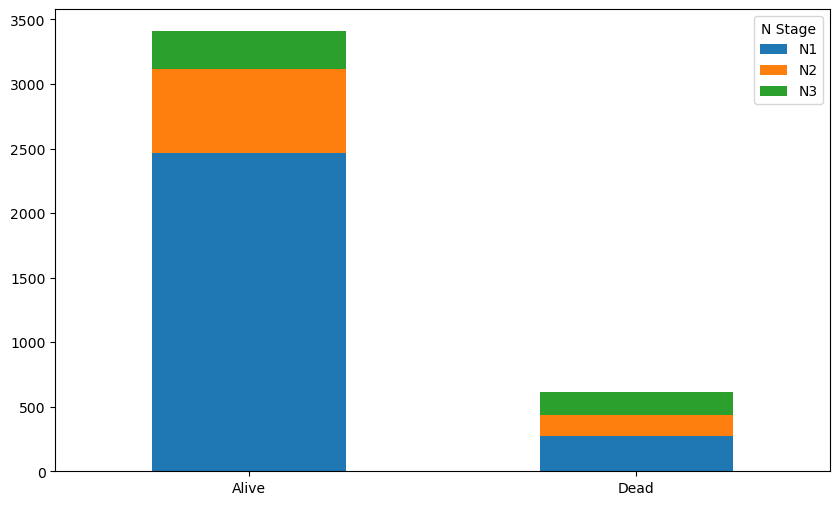

In [13]:
bar_chart('N Stage')

<Axes: xlabel='Status', ylabel='count'>

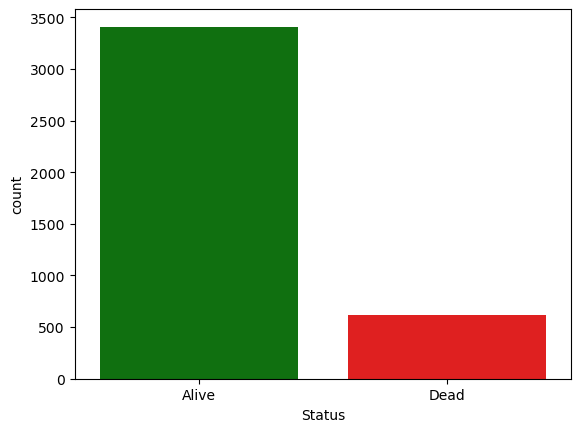

In [14]:
sns.countplot(x='Status' , data=df , palette=(['g' , 'r']))

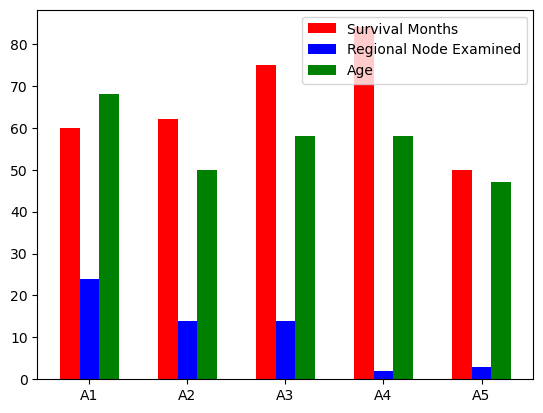

In [15]:
g1 =df['Survival Months'].head()
g2 =df['Regional Node Examined'].head()
g3 =df['Age'].head()
       
plt.subplots()
index =np.arange(5)
width = 0.2
       
plt.bar(index, g1, width, color='r' , label='Survival Months')
plt.bar(index+width, g2, width, color='b' , label='Regional Node Examined')
plt.bar(index+ 2*width, g3, width, color='g' , label='Age')

plt.xticks(index+width, ['A1', 'A2', 'A3', 'A4', 'A5'])
plt.legend();

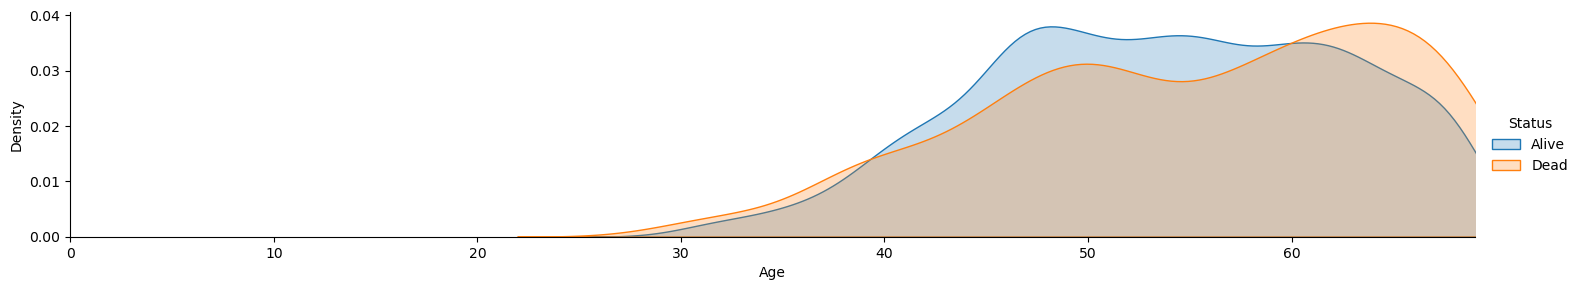

In [16]:
# Use the `map` method to apply a Kernel Density Estimate (KDE) plot to the "Age" column.
facet =sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

plt.show()

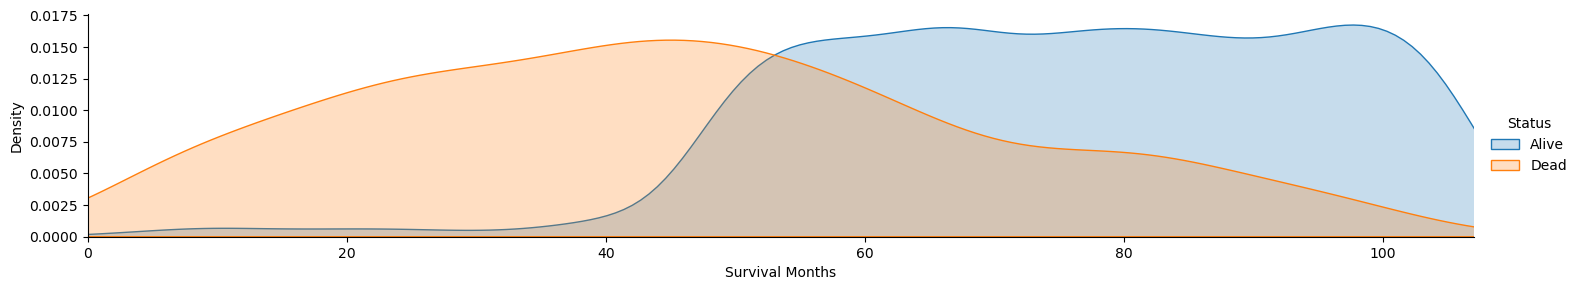

In [17]:
# Use the `map` method to apply a Kernel Density Estimate (KDE) plot to the "Survival Months" column.
facet =sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot, 'Survival Months',shade=True)
facet.set(xlim=(0, df['Survival Months'].max()))
facet.add_legend()

plt.show()

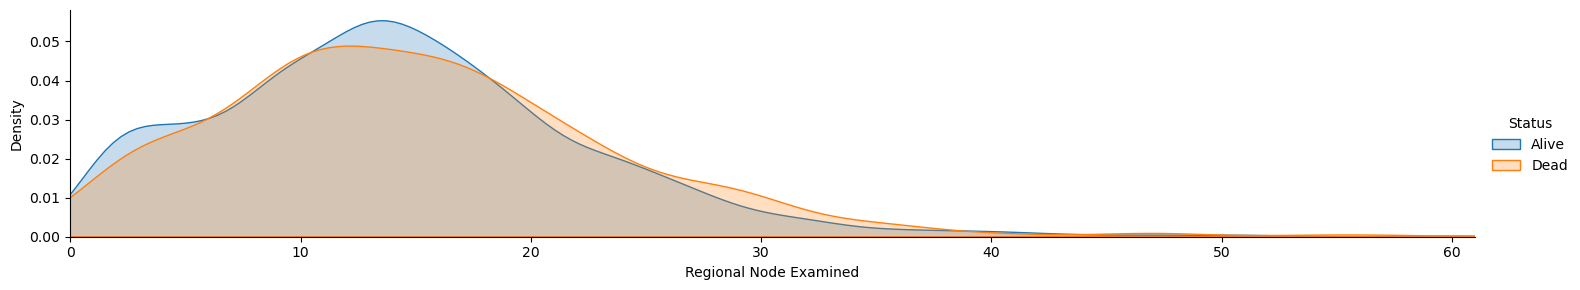

In [18]:
# Use the `map` method to apply a Kernel Density Estimate (KDE) plot to the "Regional Node Examined" column.
facet =sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot, 'Regional Node Examined',shade=True)
facet.set(xlim=(0, df['Regional Node Examined'].max()))
facet.add_legend()

plt.show()

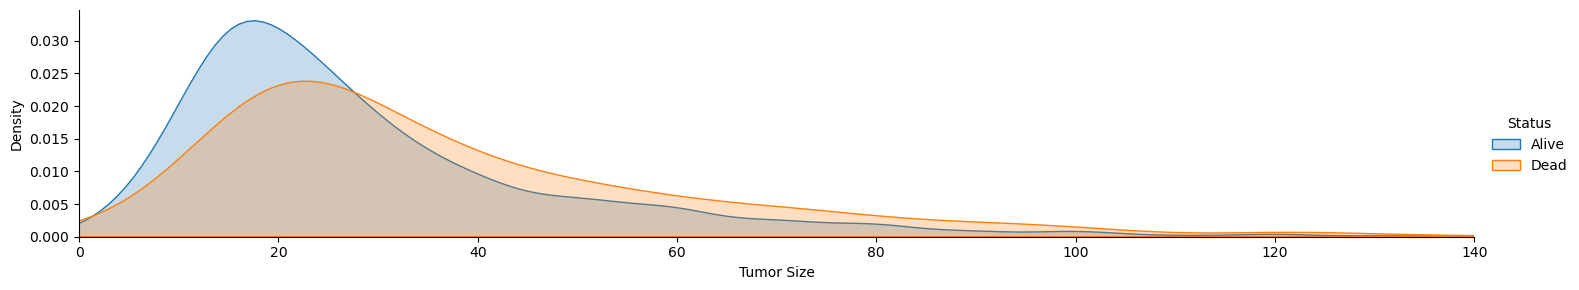

In [19]:
# Use the `map` method to apply a Kernel Density Estimate (KDE) plot to the "Tumor Size" column.
facet =sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot, 'Tumor Size',shade=True)
facet.set(xlim=(0, df['Tumor Size'].max()))
facet.add_legend()

plt.show()

In [20]:
df['Grade'] =df['Grade'].replace(['1','2','3',' anaplastic; Grade IV'],[1,2,3,4])

In [21]:
df['Grade'].unique()

array([3, 2, 1, 4], dtype=int64)

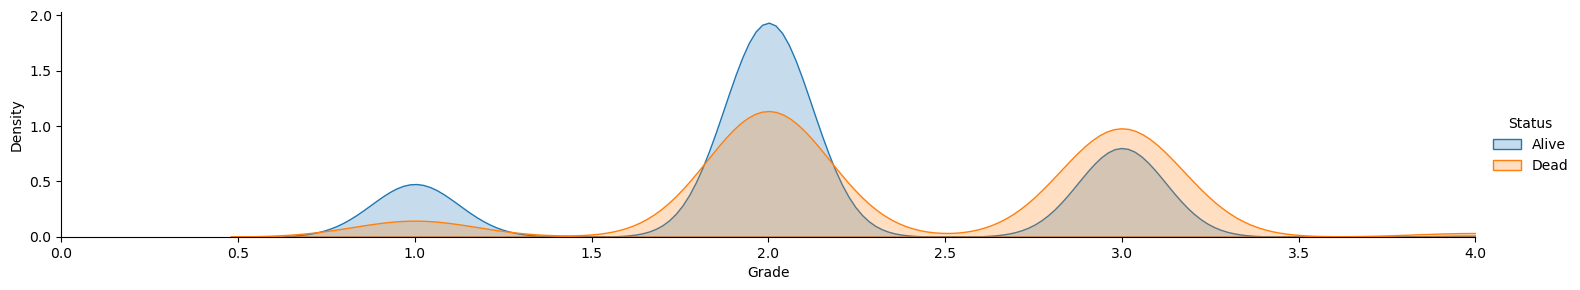

In [22]:
# Use the `map` method to apply a Kernel Density Estimate (KDE) plot to the "Grade" column.
facet =sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot, 'Grade',shade=True)
facet.set(xlim=(0, df['Grade'].max()))
facet.add_legend()

plt.show()

# Data Preprocessing

In [23]:
# Assuming `le` is a LabelEncoder object from sklearn.

le = LabelEncoder()

In [24]:
# Encode the 'Progesterone Status' column.

df['Progesterone Status'] = le.fit_transform(df['Progesterone Status'])
# Encode the 'Estrogen Status' column.

df["Estrogen Status"] = le.fit_transform(df["Estrogen Status"])
# Encode the '6th Stage' column.

df["6th Stage"] = le.fit_transform(df["6th Stage"])
# Encode the 'A Stage' column.

df["A Stage"] = le.fit_transform(df["A Stage"])

In [25]:
# Assuming `std` is a StandardScaler object from sklearn.

std = StandardScaler()

In [26]:
# Standardization scales the data to have a mean of 0 and a standard deviation of 1.
# `reshape(-1, 1)` is used to convert the column into the correct shape for the scaler.

df["Survival Months"] = std.fit_transform(df["Survival Months"].values.reshape(-1, 1))
df["Regional Node Examined"] = std.fit_transform(df["Regional Node Examined"].values.reshape(-1, 1))
df["Tumor Size"] = std.fit_transform(df["Tumor Size"].values.reshape(-1, 1))

In [27]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [28]:
# The `replace` method is used to find and replace specific values in the column.
# It also searches for the strings and replaces it with the integer 0.


df['Status'] = df['Status'].replace(['Alive','Dead',],[1,0])

In [29]:
df['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [30]:
df['T Stage'] =df['T Stage'].replace(['T1', 'T2', 'T3', 'T4'], [1,2,3,4])

In [31]:
df['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [32]:
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'],[1,2,3,0])

In [33]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [34]:
df['N Stage'] =df['N Stage'].replace(['N1', 'N2', 'N3',], [1,2,3])

In [35]:
df['Race'].unique

<bound method Series.unique of 0       White
1       White
2       White
3       White
4       White
        ...  
4019    Other
4020    White
4021    White
4022    Black
4023    White
Name: Race, Length: 4024, dtype: object>

In [36]:
df['Race'] = df['Race'].replace(['White','Black','Other',],[1,0,2])

In [37]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [38]:
df['Marital Status'] = df['Marital Status'].replace(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],[1,0,2,3,4])

In [39]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,1,1,1,0,1,3,1,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,50,1,1,2,2,2,2,1,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,58,1,0,3,4,2,2,1,1.540287,1,1,-0.044095,7,0.161530,1,3
3,58,1,1,1,0,1,3,1,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,47,1,1,1,1,1,3,1,0.498475,1,1,-1.402343,1,-0.929288,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,1,1,0,2,2,1,-1.016886,1,1,-1.649297,1,-0.972921,1,1
4020,56,1,0,2,2,2,2,1,0.735251,1,1,-0.044095,8,-0.100266,1,2
4021,68,1,1,1,1,2,2,1,-0.401271,1,0,-0.414526,3,-0.100266,1,2
4022,58,0,0,1,1,2,2,1,0.640541,1,1,-0.414526,1,0.030632,1,2


# train_test_split

In [40]:
x = df.drop('Status' ,axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state=42)

# Machine Learning Models

# LogisticRegression

In [41]:
LogR =LogisticRegression(random_state = 42)

In [42]:
LogR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred = LogR.predict(x_test)

In [44]:
train_accuracy =accuracy_score(y_train,LogR.predict(x_train))

In [45]:
test_accuracy =accuracy_score(y_test, y_pred)

In [46]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 0.8844002486016159
Testing Accuracy: 0.8997929606625259


In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58       361
           1       0.91      0.98      0.94      2054

    accuracy                           0.90      2415
   macro avg       0.85      0.72      0.76      2415
weighted avg       0.89      0.90      0.89      2415



# SVM

In [48]:
svm =SVC(kernel =('poly'), random_state= 0)

In [49]:
svm.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [50]:
y_pred = svm.predict(x_test)

In [51]:
train_accuracy =accuracy_score(y_train,svm.predict(x_train))

In [52]:
test_accuracy =accuracy_score(y_test, y_pred)

In [53]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 0.8415164698570541
Testing Accuracy: 0.8505175983436853


In [54]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.85      1.00      0.92      2054

    accuracy                           0.85      2415
   macro avg       0.43      0.50      0.46      2415
weighted avg       0.72      0.85      0.78      2415



# DecisionTreeClassifier

In [55]:
DTC = DecisionTreeClassifier()

In [56]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred = DTC.predict(x_test)

In [58]:
train_accuracy =accuracy_score(y_train,DTC.predict(x_train))

In [59]:
test_accuracy =accuracy_score(y_test, y_pred)

In [60]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 1.0
Testing Accuracy: 0.832712215320911


In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.48       361
           1       0.91      0.89      0.90      2054

    accuracy                           0.83      2415
   macro avg       0.68      0.71      0.69      2415
weighted avg       0.84      0.83      0.84      2415



# KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [64]:
y_pred = knn.predict(x_test)

In [65]:
train_accuracy =accuracy_score(y_train,DTC.predict(x_train))

In [66]:
test_accuracy =accuracy_score(y_test, y_pred)

In [67]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 1.0
Testing Accuracy: 0.84472049689441


In [68]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.31      0.38       361
           1       0.89      0.94      0.91      2054

    accuracy                           0.84      2415
   macro avg       0.68      0.63      0.64      2415
weighted avg       0.82      0.84      0.83      2415



# RandomForestClassifier

In [69]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = RF.predict(x_test)

In [72]:
train_accuracy =accuracy_score(y_train,RF.predict(x_train))

In [73]:
test_accuracy =accuracy_score(y_test, y_pred)

In [74]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 1.0
Testing Accuracy: 0.9093167701863354


In [75]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       361
           1       0.92      0.98      0.95      2054

    accuracy                           0.91      2415
   macro avg       0.86      0.75      0.79      2415
weighted avg       0.90      0.91      0.90      2415



In [76]:
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))

confusion_matrix:
[[ 186  175]
 [  44 2010]]


In [77]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

In [78]:
grid_search = GridSearchCV(estimator = RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [79]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [80]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [81]:
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
importances = RF.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [83]:
print(feature_importance_df)

                   Feature  Importance
13         Survival Months    0.343402
0                      Age    0.129326
8               Tumor Size    0.114145
11  Regional Node Examined    0.106971
12   Reginol Node Positive    0.075571
2           Marital Status    0.046180
10     Progesterone Status    0.026818
14                 T Stage    0.026580
4                6th Stage    0.026083
1                     Race    0.023542
5            differentiate    0.022697
6                    Grade    0.021812
3                  N Stage    0.017190
9          Estrogen Status    0.014886
7                  A Stage    0.004796


# XGBoost

In [84]:
xgb = XGBClassifier(use_label_encoder= False, evel_metric='mlogloos')

In [85]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              evel_metric='mlogloos', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [86]:
y_pred = xgb.predict(x_test)

In [87]:
train_accuracy =accuracy_score(y_train,xgb.predict(x_train))

In [88]:
test_accuracy =accuracy_score(y_test, y_pred)

In [89]:
print("Traning Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Traning Accuracy: 1.0
Testing Accuracy: 0.8886128364389234


In [90]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       361
           1       0.92      0.95      0.94      2054

    accuracy                           0.89      2415
   macro avg       0.79      0.74      0.76      2415
weighted avg       0.88      0.89      0.88      2415



In [91]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 191  170]
 [  99 1955]]


In [92]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]}

In [93]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [94]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     evel_metric='mlogloos', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=N...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [95]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [96]:
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


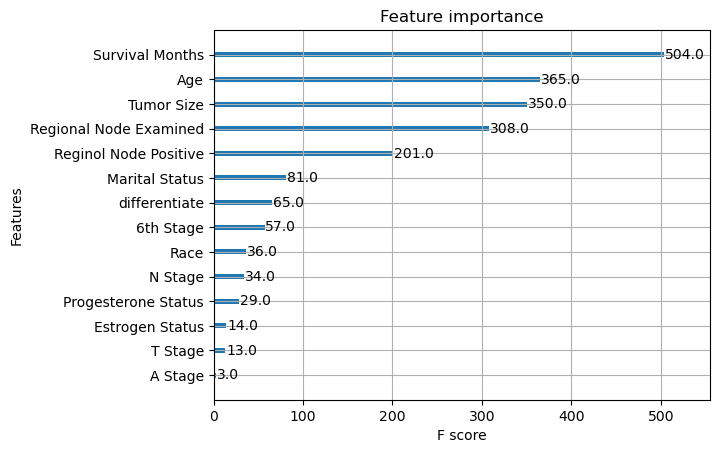

In [97]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()

# VotingClassifier

In [98]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
RF = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
DTC = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
LogR = LogisticRegression(max_iter=1000)

In [99]:
voting_clf = VotingClassifier(
    estimators=[
        ('CLF1', xgb),
        ('CLF2', RF),
        ('CLF3', knn),
        ('CLF4', DTC),
        ('CLF5', svm),
        ('CLF6', LogR)
    ],
    voting='soft'
)

In [100]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('CLF1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lear...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('CLF2', RandomForestClassifier(random_state=42)),
                             ('CLF3', KNeighborsClassifier()),
                             ('CLF4', DecisionTreeClassifier(random_state=42)),
                             ('CLF5', SVC(probability=True, random_state=42)),
                             ('CLF6', LogisticRegression(max_iter=1000))],
                 voting='soft')

In [101]:
y_pred = voting_clf.predict(x_test)

In [102]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


In [103]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.48      0.61       361
           1       0.92      0.98      0.95      2054

    accuracy                           0.91      2415
   macro avg       0.87      0.73      0.78      2415
weighted avg       0.90      0.91      0.90      2415



In [104]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 174  187]
 [  36 2018]]


# Classification Report

In [106]:
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

In [108]:
df

,precision,recall,f1-score,support
0,0.828571,0.481994,0.609457,361.00000
1,0.915193,0.982473,0.947640,2054.00000
accuracy,0.907660,0.907660,0.907660,0.90766
macro avg,0.871882,0.732234,0.778549,2415.00000
weighted avg,0.902244,0.907660,0.897088,2415.00000


In [110]:
classification_report_str = classification_report(y_test, y_pred)

In [111]:
report_data = {}
lines = classification_report_str.split('\n')
for line in lines[2:-5]:
    row_data = line.split()
    if len(row_data) > 0:
        class_name = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1_score = float(row_data[3])
        support = int(row_data[4])
        report_data[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

In [112]:
report_df = pd.DataFrame.from_dict(report_data, orient='index')

In [113]:
report_df.to_csv('classification_report.csv')